In [39]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Opening the data.

In [40]:
num_obs = 20
laliga_df = pd.read_csv('playerstats.csv', delimiter=",")
minutes_model = pd.DataFrame()
minutes_model = minutes_model.assign(minutes=laliga_df['Min'])
minutes_model = minutes_model.assign(age=laliga_df['Age'])

# Make an age squared column so we can for polynomial model.
minutes_model = minutes_model.assign(age_squared=np.power(laliga_df['Age'], 2))
minutes_model = minutes_model.assign(age_cubed=np.power(laliga_df['Age'], 3))

## Plotting data.

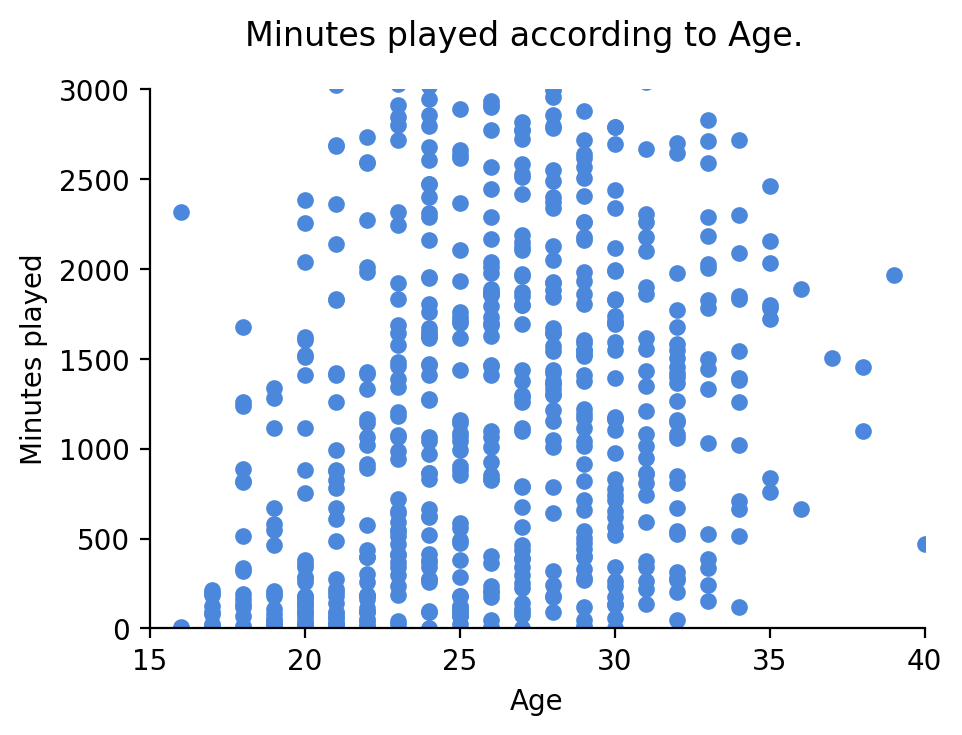

In [41]:
fig = plt.figure(figsize=(5, 3.5), dpi=200)
ax = plt.subplot(111)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker='.', markersize=10, color='#4b87db')
ax.set_ylabel('Minutes played')
ax.set_xlabel('Age')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((15, 40))
plt.ylim((0, 3000))
fig.suptitle("Minutes played according to Age.")
plt.show()

## Fitting the model.

We are going to begin by doing a straight line linear regression.

$$ y = b_0 + b_1 x $$

A straight line relationship between minutes played and age.

In [42]:
model_fit = smf.ols(formula='minutes ~ age', data = minutes_model).fit()
print(model_fit.summary())
b = model_fit.params

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     73.92
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           6.77e-17
Time:                        11:10:28   Log-Likelihood:                -5070.1
No. Observations:                 616   AIC:                         1.014e+04
Df Residuals:                     614   BIC:                         1.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -536.3642    207.420     -2.586      0.0

## Comparing the fit.

We can now use the fit to plot a line through the data.

$$ y = b_0 + b_1 x $$

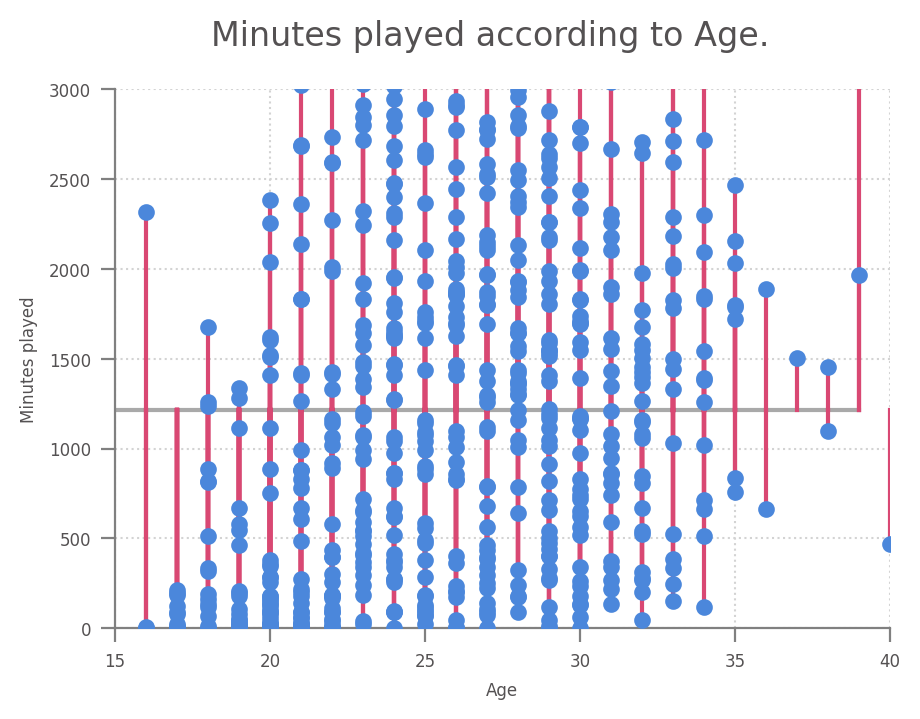

In [43]:
# First plot the data as previously.
fig = plt.figure(figsize=(5, 3.5), dpi=200)
ax = plt.subplot(111)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker='.', markersize=10, color='#4b87db', zorder=3)
ax.set_ylabel('Minutes played', color='#545152', fontsize=6)
ax.set_xlabel('Age', color='#545152', fontsize=6)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('grey')

# set the grid.
ax.grid(
    visible=True,
    lw=0.75,
    ls=":",
    color="lightgrey"
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "#545152"
)

plt.xlim((15, 40))
plt.ylim((0, 3000))
fig.suptitle("Minutes played according to Age.", color="#545152")

# Now create the line through data.
x = np.arange(40, step=1)
y = np.mean(minutes_model['minutes'])*np.ones(40)
ax.plot(x, y, color="darkgrey")

# Show distances for each point.
for i, a in enumerate(minutes_model['age']):
    ax.plot([a, a], [minutes_model['minutes'][i], np.mean(minutes_model['minutes'])], color='#d94873', zorder=2)
plt.show()

## A model including Squared Terms.

We not fit the quadratic model.

$$ y = b_0 + b_1 x + b_2 x^2 $$

In [44]:
# First fit the model
model_fit=smf.ols(formula='minutes  ~ age + age_squared', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     51.35
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           2.41e-21
Time:                        11:10:28   Log-Likelihood:                -5057.4
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     613   BIC:                         1.013e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5255.8833    951.226     -5.525      

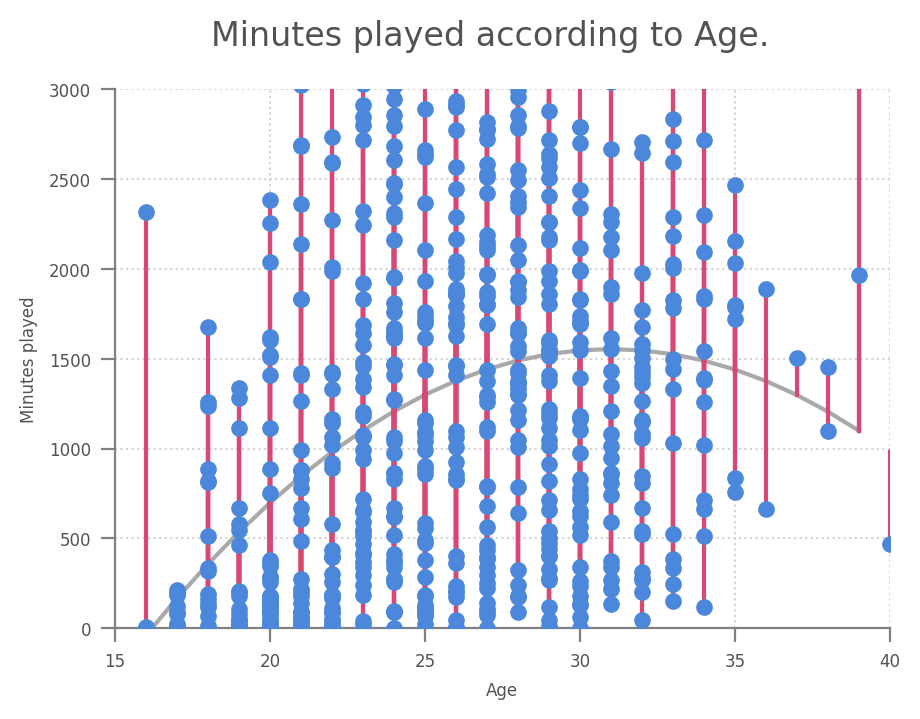

In [45]:
# First plot the data as previously.
fig = plt.figure(figsize=(5, 3.5), dpi=200)
ax = plt.subplot(111)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker='.', markersize=10, color='#4b87db', zorder=3)
ax.set_ylabel('Minutes played', color='#545152', fontsize=6)
ax.set_xlabel('Age', color='#545152', fontsize=6)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('grey')

# set the grid.
ax.grid(
    visible=True,
    lw=0.75,
    ls=":",
    color="lightgrey"
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "#545152"
)

plt.xlim((15, 40))
plt.ylim((0, 3000))
fig.suptitle("Minutes played according to Age.", color="#545152")

# Now create the line through data.
x=np.arange(40,step=1)
y= b.iloc[0] + b.iloc[1]*x + b.iloc[2]*x*x
ax.plot(x, y, color="darkgrey")

# Show distances for each point.
for i, a in enumerate(minutes_model['age']):
    ax.plot([a, a], [minutes_model['minutes'][i], b.iloc[0] + b.iloc[1]*a + b.iloc[2]*a*a], color='#d94873', zorder=2)
plt.show()

In [46]:
b

Intercept     -5255.883343
age             439.430056
age_squared      -7.088869
dtype: float64

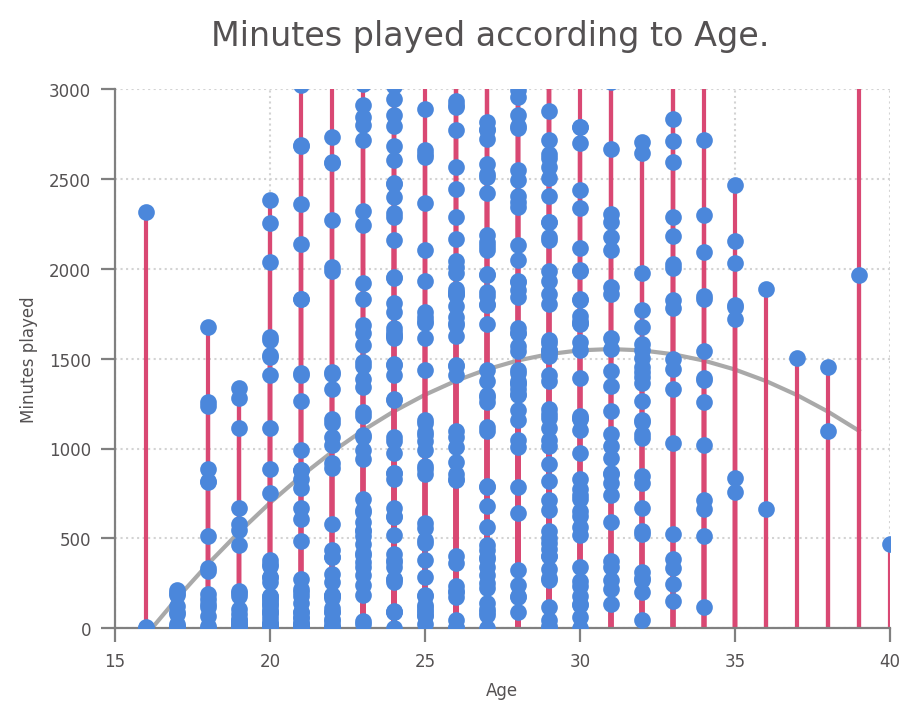

In [47]:
# First plot the data as previously.
fig = plt.figure(figsize=(5, 3.5), dpi=200)
ax = plt.subplot(111)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker='.', markersize=10, color='#4b87db', zorder=3)
ax.set_ylabel('Minutes played', color='#545152', fontsize=6)
ax.set_xlabel('Age', color='#545152', fontsize=6)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('grey')

# set the grid.
ax.grid(
    visible=True,
    lw=0.75,
    ls=":",
    color="lightgrey"
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "#545152"
)

plt.xlim((15, 40))
plt.ylim((0, 3000))
fig.suptitle("Minutes played according to Age.", color="#545152")

# Now create the line through data.
x=np.arange(40,step=1)
y= b.iloc[0] + b.iloc[1]*x + b.iloc[2]*x*x
ax.plot(x, y, color="darkgrey")

# Show distances for each point.
for i, a in enumerate(minutes_model['age']):
    ax.plot([a, a], [minutes_model['minutes'][i], b.iloc[0] + b.iloc[2]*a*a*a], color='#d94873', zorder=2)
plt.show()

## Cubic model.

In [68]:
# First fit the model
model_fit=smf.ols(formula='minutes  ~ age + age_squared + age_cubed', data=minutes_model).fit()
print(model_fit.summary())
b=model_fit.params

                            OLS Regression Results                            
Dep. Variable:                minutes   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     34.82
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           8.73e-21
Time:                        12:18:20   Log-Likelihood:                -5056.6
No. Observations:                 616   AIC:                         1.012e+04
Df Residuals:                     612   BIC:                         1.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.024e+04   4002.240     -2.559      

In [69]:
print(b.iloc[0], b.iloc[1], b.iloc[2], b.iloc[3])

-10241.781779286106 1024.956041526635 -29.398877131593956 0.2763424352862911


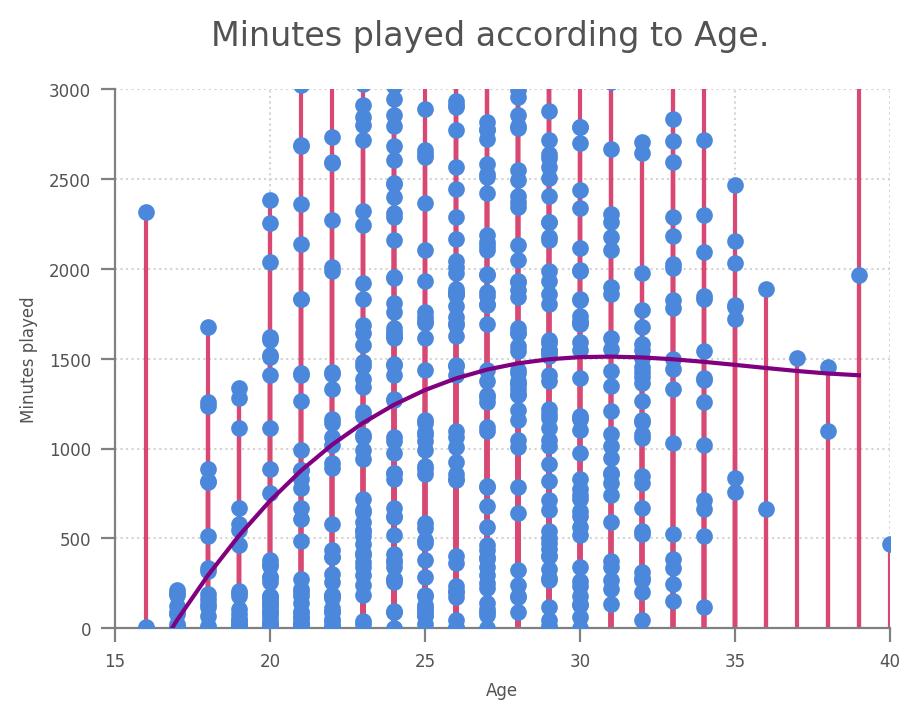

In [82]:
# First plot the data as previously.
fig = plt.figure(figsize=(5, 3.5), dpi=200)
ax = plt.subplot(111)
ax.plot(minutes_model['age'], minutes_model['minutes'], linestyle='none', marker='.', markersize=10, color='#4b87db', zorder=3)
ax.set_ylabel('Minutes played', color='#545152', fontsize=6)
ax.set_xlabel('Age', color='#545152', fontsize=6)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('grey')

# set the grid.
ax.grid(
    visible=True,
    lw=0.75,
    ls=":",
    color="lightgrey"
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "#545152"
)

plt.xlim((15, 40))
plt.ylim((0, 3000))
fig.suptitle("Minutes played according to Age.", color="#545152")

# Now create the line through data.
x=np.arange(40,step=1)
y= b.iloc[0] + b.iloc[1]*x + b.iloc[2]*x*x + b.iloc[3] * x * x * x
ax.plot(x, y, color="purple", zorder=5)

# Show distances for each point.
for i, a in enumerate(minutes_model['age']):
    ax.plot([a, a], [minutes_model['minutes'][i], b.iloc[0] + b.iloc[2] * a * a + b.iloc[3]*a*a*a], color='#d94873', marker='.', zorder=2)
plt.show()

## Natural Cubic Spline.

### Defining the natural cubic spline function.

In [92]:
def natural_cubic_spline(x, knots):
    n = len(x)
    k = len(knots)
    h = np.diff(knots)

    # Basis matrix.
    B = np.zeros((n, k))

    for i in range(k):
        B[:, i] = np.maximum(0, x - knots[i]) ** 3

    # Construct the matrix for the neutral conditions.
    A = np.zeros((k, k))
    A[0, 0] = 1
    A[1, 1] = 1

    for i in range(2, k):
        A[i, i - 2] = 1 / h[i - 1]
        A[i, i - 1] = -1 / h[i-1] - 1 / h[1-2]
        A[i, i] = 1 / h[i-2]

    C = np.zeros(k)
    c[2:] = np.diff(minutes_model['minutes'], 2) / h[:-1]

    # solve for coefficients.
    coef = np.linealg.solve(A, c)

    return B @ coef

In [100]:
# Defining knots and calculate the spline.
knots = np.linspace(minutes_model['age'].min(), minutes_model['age'].max(), 4)
h = np.diff(knots)
# spline_values = natural_cubic_spline(minutes_model['age'].values.tolist(), knots)

In [101]:
h

array([8., 8., 8.])

In [102]:
!pip install patsy


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip
